<div class='alert alert-success'>
    <h1 align="center"> Handwritten digit dataset in Farsi & English</h1> 
     <h1 align="center">   Image classification </h1>
</div>

# Handwritten Farsi digits


Although Farsi is a right to left script, its digits are written from left to righ. HODA dataset has 102,352 digits which extracted from about 12,000 registration forms. 



<img src='./image/digit.png' width='50%'/>

In [ ]:
#! pip install scikit-image   # install scikit-image

In [1]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
from skimage.transform import resize

This dataset is written with Matlab, one can load it with "scipy".

In [2]:
#load dataset
dataset = io.loadmat('./dataset/Data_hoda_full.mat')

In [3]:
dataset


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jun 30 20:26:30 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Data': array([[array([[  0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0],
        [  0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0, 255, 255,   0],
        [  0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0, 255, 255, 255, 255],
        [  0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0, 255, 255, 255, 255,   0],
        [  0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0, 255, 255, 255, 255, 255,   0],
        [255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         255, 255, 255, 255, 255,   0,   0],
        [255

This set has 60,000 digit for Training set and 20,000 digits for test set.

In [4]:
#test and training set split
X_train_orginal = np.squeeze(dataset['Data'][:10000])
y_train = np.squeeze(dataset['labels'][:10000])
X_test_original = np.squeeze(dataset['Data'][10000:12000])
y_test = np.squeeze(dataset['labels'][10000:12000])

"squeeze": Remove single-dimensional entries from the shape of an array.

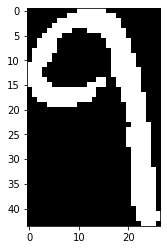

In [5]:
plt.imshow(X_train_orginal[400], cmap='gray')
plt.show()

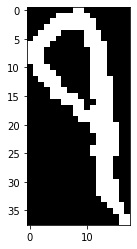

Label of 9000th image is: 9


In [6]:
i=9000
image = X_train_orginal[i]
label = y_train[i]
plt.imshow(image, cmap='gray')
plt.show()
print("Label of {}th image is: {}".format(i, label))

In [7]:
image.shape

(38, 18)

In [8]:
#resize the image from ** to (5,5)
X_train_5by5 = [resize(img, (5, 5)) for img in X_train_orginal]
X_test_5by_5 = [resize(img, (5, 5)) for img in X_test_original]

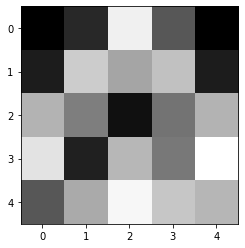

In [9]:
image = X_train_5by5[1]
plt.imshow(image, cmap='gray')
plt.show()

In [10]:
image.shape  

(5, 5)

In [11]:
#reshape
X_train = [x.reshape(25) for x in X_train_5by5]
X_test = [x.reshape(25) for x in X_test_5by_5]

In [12]:
X_train[0].shape

(25,)

**n_neighbor is a hyperparameter which needs to be tuned.**

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [14]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

# Predictions and Evaluations

Let's evaluate our KNN model!

In [15]:
sample = 24

X = [X_test[sample]]

predicted_class = neigh.predict(X)
actual_class = y_test[sample]

print ("Sample {} is a {}, and you prediction is: {}.".format(sample, actual_class, predicted_class[0]))

Sample 24 is a 2, and you prediction is: 2.


In [16]:
print(neigh.predict_proba(X))

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [17]:
y_pred = neigh.predict(X_test)


print("Predicted classes is:")
print(y_pred)
print("==========================================================================")
print("True classes is:")
print(y_test)

Predicted classes is:
[5 8 8 ... 6 8 5]
True classes is:
[5 8 8 ... 6 8 5]


In [18]:
acc = neigh.score(X_test, y_test)
print ("Accuracy is %.3f %%" %(acc*100))

Accuracy is 96.350 %


In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(confusion_matrix(y_pred,y_test))

[[216   9   0   0   0   1   0   1   0   0]
 [  3 187   1   0   0   0   0   0   0   0]
 [  0   0 189  11   4   0   1   1   0   1]
 [  0   0   0 166  20   1   0   0   0   0]
 [  0   0   0   3 176   1   0   0   0   0]
 [  0   0   0   0   0 181   1   0   0   0]
 [  0   0   0   0   0   0 206   0   0   6]
 [  1   0   2   0   0   0   0 204   0   0]
 [  0   0   0   0   0   1   0   0 202   0]
 [  0   1   0   0   0   0   1   0   2 200]]


In [21]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

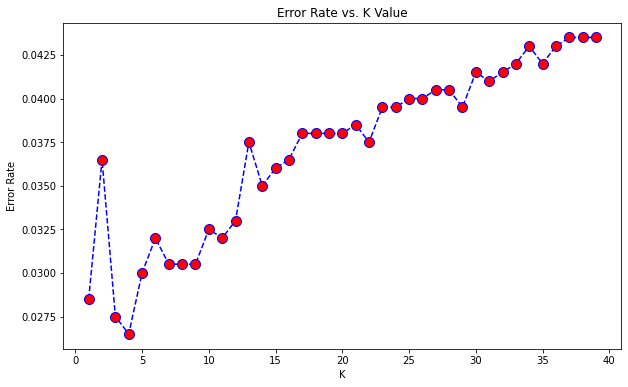

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>4 the error rate just tends to hover around 0.02 Let's retrain the model with that and check the classification report! K=4 is the minimum

In [25]:
# NOW WITH K=4
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=4')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



WITH K=4


[[217   2   0   0   0   0   0   1   0   0]
 [  5 191   0   0   0   0   0   0   0   1]
 [  0   1 188   1   0   0   0   2   0   0]
 [  0   0   6 171   3   0   0   0   0   0]
 [  0   0   3  12 185   0   0   0   0   0]
 [  1   0   0   0   1 181   1   0   1   0]
 [  0   0   1   0   0   1 206   0   0   1]
 [  1   0   0   0   0   0   0 205   0   0]
 [  0   0   0   0   0   0   1   0 201   2]
 [  0   0   1   0   0   0   4   0   0 202]]


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       220
           1       0.98      0.97      0.98       197
           2       0.94      0.98      0.96       192
           3       0.93      0.95      0.94       180
           4       0.98      0.93      0.95       200
           5       0.99      0.98      0.99       185
           6       0.97      0.99      0.98       209
           7       0.99      1.00      0.99       206
           8       1.00      0.99      0.99       204
           9   

**Improved!**